#### Cricket match analysis

We are attempting to analyse Cricket match played. Data obtained from csv.

In [ ]:
# When maximum number of matches played ?
# Who won the most matches (Seasonwise and total)
# How many matches ended in tie and no result 
# Relation between toss win and match win
# Relation between toss win decision and match win
# Best performing player season wise and total
# Correlation

#### Importing packages                                          

In [2]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output



#### Importing the Dataset

In [3]:
cricket = pd.read_csv("/Users/dhanbhan/Desktop/matches.csv")     # Importing training dataset using pd.read_csv

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>

In [5]:
cricket.shape                                                    # This will print the number of rows and comlumns of the Data Frame

(696, 18)

wine_data has __696 rows__ and __18 columns.__

In [6]:
cricket.columns                                            # This will print the names of all columns.

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
cricket.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


<a id=section301></a>

In [8]:
cricket.info()                                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB


In [9]:
cricket.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


In [10]:
cricket.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

From the above output we can see that __umpire3__ , __player_of_match__ , __winner__ and  __city__ columns contains __more null values__. We will see how to deal with them.

<a id=section302></a>

In [12]:
profile = pandas_profiling.ProfileReport(cricket)
profile.to_file(outputfile="IPL_before_preprocessing.html")

/Users/dhanbhan/anaconda3/lib/python3.7/site-packages/pandas_profiling/model/correlations.py:124: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The internally computed table of expected frequencies has a zero element at (0, 6).')
  correlation_name=correlation_name, error=error


TypeError: to_file() got an unexpected keyword argument 'outputfile'

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __IPL_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

<a id=section303></a>

- Dealing with missing values<br/>
    - Dropping/Replacing missing entries of __Embarked.__
    - Replacing missing values of __Age__ with median values.
    - Dropping the column __'Cabin'__ as it has too many _null_ values.
    - Replacing 0 values of fare with median values.
    - Replacing Date type to datetime

In [144]:
drop_cols = ['umpire3']
cricket = cricket.drop(drop_cols, axis=1)

We dont need Umpire3 

In [46]:
#cricket[cricket.winner.isnull()
#cricket[cricket.city.isnull()
cricket.winner.fillna('no result', inplace = True)
cricket.player_of_match.fillna('no result', inplace = True)
cricket.city.fillna('Dubai', inplace = True)
cricket.umpire1.fillna(cricket['umpire1'].mode()[0], inplace = True)
cricket.umpire2.fillna(cricket['umpire2'].mode()[0], inplace = True)
cricket['season'] = cricket.season.astype(str)

Observed all matches played in Dubai are marked as null in City column

In [59]:
cricket['Homeland'] = cricket.apply(lambda x: 0 if x['city'] == 'Dubai' else 1,axis=1)

In [60]:
cricket['date'] = pd.to_datetime(cricket['date'])    # Convert "timestamp" data type from object to datetime      
cricket.dtypes  


id                          int64
season                     object
city                       object
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
dl_applied                  int64
winner                     object
win_by_runs                 int64
win_by_wickets              int64
player_of_match            object
venue                      object
umpire1                    object
umpire2                    object
umpire3                    object
Homeland                    int64
dtype: object

In [ ]:
cricket.replace(to_replace ="Rising Pune Supergiants", value ="Rising Pune Supergiant", inplace = True) 

Correct spelling mistake for pune team 

In [ ]:
cricket.isnull().sum()     

In [13]:
cricket.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


<a id=section304></a>

In [20]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(cricket)
profile.to_file(output_file="ipl_after_preprocessing.html")

In [103]:
cricket.groupby(['season'])['season'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
Name: season, dtype: int64

Text(0.5, 1.0, 'Matches played')

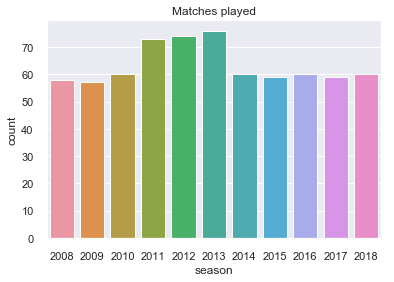

In [14]:
sns.countplot(x='season', data=cricket).set_title('Matches played')

Highest matches played in 2013 (76 matches) and less matches played in 2015 & 2017 (59 matches)

In [138]:
#cricket.groupby(['season','player_of_match'])['player_of_match'].count()>1

cricket.groupby(['season'])['player_of_match'].value_counts()
#cricket.player_of_match.value_counts()>10

season  player_of_match 
2008    SE Marsh            5
        SR Watson           4
        YK Pathan           4
        AC Gilchrist        2
        M Ntini             2
        MS Dhoni            2
        SC Ganguly          2
        SM Pollock          2
        ST Jayasuriya       2
        Sohail Tanvir       2
        V Sehwag            2
        A Kumble            1
        A Mishra            1
        A Nehra             1
        BB McCullum         1
        CRD Fernando        1
        DJ Bravo            1
        DJ Hussey           1
        DPMD Jayawardene    1
        GC Smith            1
        GD McGrath          1
        IK Pathan           1
        JA Morkel           1
        JDP Oram            1
        KC Sangakkara       1
        KD Karthik          1
        L Balaji            1
        MEK Hussey          1
        MF Maharoof         1
        ML Hayden           1
                           ..
2018    CH Gayle            2
        KL Rahu

SE Marsh, SR Watson, YK Pathan are top 3 consistent players in Season 2008

<a id=section402></a>

/Users/dhanbhan/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Factor plot for winner ')

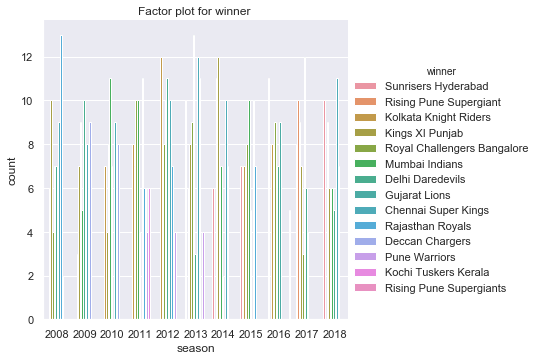

In [92]:
sns.factorplot('season', hue='winner', kind='count', data=cricket)
plt.title('Factor plot for winner ')

This visual plot represents Team who won most season wise. Ex . From the graph Rajasthan Royals won more matches in 2013

In [101]:
cricket.groupby(['winner'])['winner'].count()

winner
Chennai Super Kings            90
Deccan Chargers                29
Delhi Daredevils               67
Gujarat Lions                  13
Kings XI Punjab                76
Kochi Tuskers Kerala            6
Kolkata Knight Riders          86
Mumbai Indians                 98
Pune Warriors                  12
Rajasthan Royals               70
Rising Pune Supergiant         10
Rising Pune Supergiants         5
Royal Challengers Bangalore    79
Sunrisers Hyderabad            52
Name: winner, dtype: int64

Mumbai Indians won most of the matches throughout all season.

Text(0.5, 1.0, 'Count plot based on toss decision')

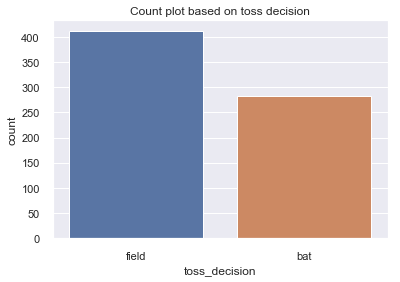

In [38]:
sns.countplot(x='toss_decision', data=cricket).set_title('Count plot based on toss decision')

In [42]:
cricket.groupby(['result'])['result'].count()

result
no result      3
normal       686
tie            7
Name: result, dtype: int64

/Users/dhanbhan/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Factorplot with kind = "count" for Match result')

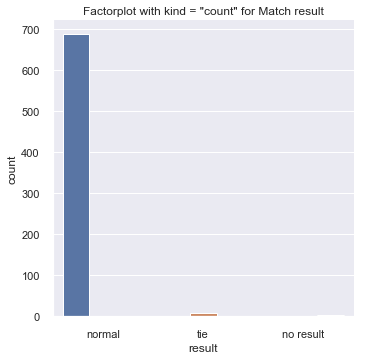

In [22]:
sns.factorplot('result', data=cricket, hue='result', kind='count')
plt.title('Factorplot with kind = "count" for Match result')

From above plot, it is noticed that out of 696 matchs played, 3 mathces ended in no result, and 7 mathes were tie.

In [87]:
winner_count_by_toss_win = cricket['winner'][cricket['winner'] == cricket['toss_winner']].count()
winner_count_who_chased = cricket['winner'][cricket['toss_decision'] == 'field'].count()
matchs_with_clear_result = 686
print("% of matches won by team who won toss " , winner_count_by_toss_win/matchs_with_clear_result*100)
print("% of matches won by team who chased " , winner_count_who_chased/matchs_with_clear_result*100)

% of matches won by team who won toss  52.04081632653062
% of matches won by team who chased  59.91253644314869


<a id=section404></a>

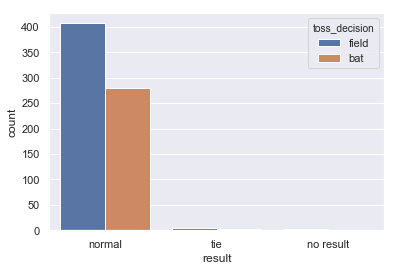

In [139]:
sns.countplot('result',data=cricket, hue='toss_decision')
plt.title('Factorplot with kind = "count" for Match result')

Moe than 400 matchs who won toss slected to field and around 275 matches who won toss elected to bat.

Text(0.5, 1.0, 'Correlation between features')

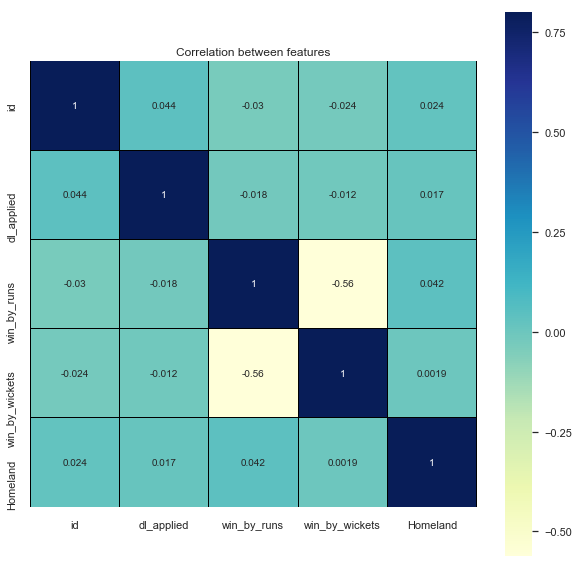

In [71]:
corr = cricket.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

Above correlation plot, it is observed that more number of matches who won by big run gaps are played in India.